<a href="https://colab.research.google.com/github/SSHARMA0204/SSHARMA/blob/main/Untitled4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #
import pandas as pd #


import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
accounts_df = pd.read_csv ('/content/account.csv', sep = ';')
cards_df = pd.read_csv ('/content/card.csv', sep = ';')
clients_df = pd.read_csv ('/content/client.csv', sep = ';')
dispos_df = pd.read_csv ('/content/disp.csv', sep = ';')
district_df = pd.read_csv ('/content/district.csv', sep = ';')
loan_df = pd.read_csv ('/content/loan.csv', sep = ';')
order_df = pd.read_csv ('/content/order.csv', sep = ';')
trans_df = pd.read_csv ('/content/trans.csv', sep = ';')

In [ ]:
clients_df.head()

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5


In [ ]:
district_df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


In [ ]:
district_df = district_df.rename(columns={'A1': 'district_id', 'A11': 'income'})

In [ ]:
district_df.head()

,district_id,A2,A3,A4,A5,A6,A7,A8,A9,A10,income,A12,A13,A14,A15,A16
0,1,Hl.m. Praha,Prague,1204953,0,0,0,1,1,100.0,12541,0.29,0.43,167,85677,99107
1,2,Benesov,central Bohemia,88884,80,26,6,2,5,46.7,8507,1.67,1.85,132,2159,2674
2,3,Beroun,central Bohemia,75232,55,26,4,1,5,41.7,8980,1.95,2.21,111,2824,2813
3,4,Kladno,central Bohemia,149893,63,29,6,2,6,67.4,9753,4.64,5.05,109,5244,5892
4,5,Kolin,central Bohemia,95616,65,30,4,1,6,51.4,9307,3.85,4.43,118,2616,3040


**1. What is the demographic profile of the bank's clients and how does it vary across districts?**

In [ ]:
# Merge clients_df and district_df tables on district_id
merged_df = pd.merge(clients_df, district_df, on='district_id')

# Perform analysis on income levels and education levels across different districts
district_analysis = merged_df.groupby('district_id').agg({
    'income': 'mean',  # Average income per district
}).reset_index()

# Display the analysis results
print("Analysis of income levels and education levels across different districts:")
print(district_analysis)

Analysis of income levels and education levels across different districts:
    district_id   income
0             1  12541.0
1             2   8507.0
2             3   8980.0
3             4   9753.0
4             5   9307.0
..          ...      ...
72           73   8746.0
73           74  10673.0
74           75   8819.0
75           76   8369.0
76           77   8909.0

[77 rows x 2 columns]


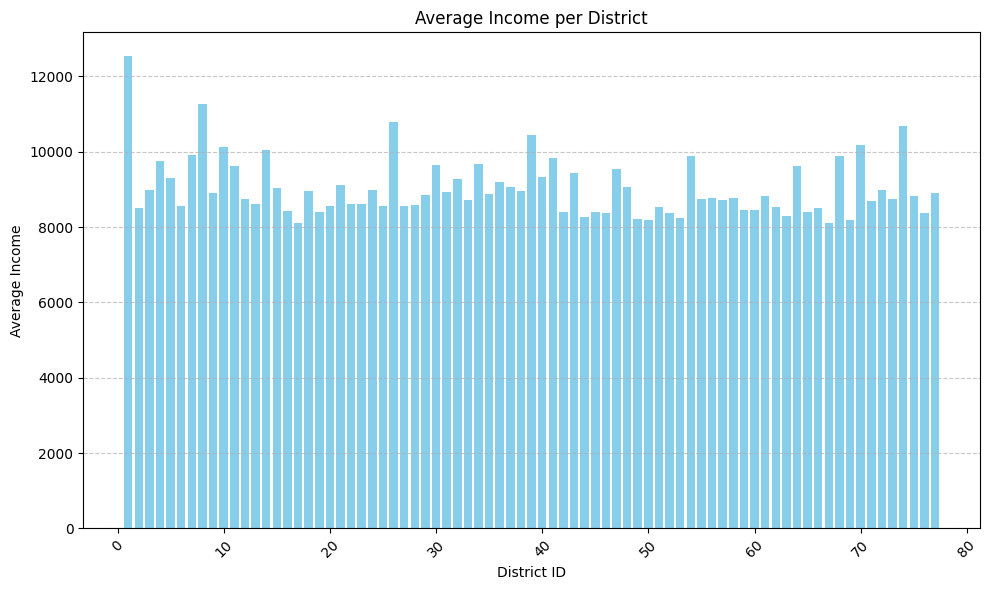

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(district_analysis['district_id'], district_analysis['income'], color='skyblue')
plt.title('Average Income per District')
plt.xlabel('District ID')
plt.ylabel('Average Income')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**2. How the banks have performed over the years. Give their detailed analysis year & month-wise.**

In [ ]:
# Convert the 'date' column to datetime format
trans_df['date'] = pd.to_datetime(trans_df['date'], format='%y%m%d')

# Extract year and month from the 'date' column
trans_df['year'] = trans_df['date'].dt.year
trans_df['month'] = trans_df['date'].dt.month

# Group data by year and month and aggregate metrics
monthly_performance = trans_df.groupby(['year', 'month']).agg(
    total_transactions=('trans_id', 'count'),
    total_amount=('amount', 'sum'),
    average_amount=('amount', 'mean')
).reset_index()

# Display the monthly performance analysis
print(monthly_performance)

    year  month  total_transactions  total_amount  average_amount
0   1993      1                 177      702157.6     3966.992090
1   1993      2                 395     2726925.3     6903.608354
2   1993      3                 676     4730318.6     6997.512722
3   1993      4                 913     7378367.8     8081.454326
4   1993      5                1306    11680753.4     8943.915314
5   1993      6                1880    18291948.9     9729.760053
6   1993      7                2399    18021294.7     7512.002793
7   1993      8                2938    21028811.6     7157.526072
8   1993      9                3441    23438701.6     6811.595931
9   1993     10                3989    27570899.7     6911.732189
10  1993     11                4422    28525741.1     6450.868634
11  1993     12                5669    40212608.4     7093.421838
12  1994      1                9139    42592232.5     4660.491575
13  1994      2                5601    31281776.7     5585.034226
14  1994  

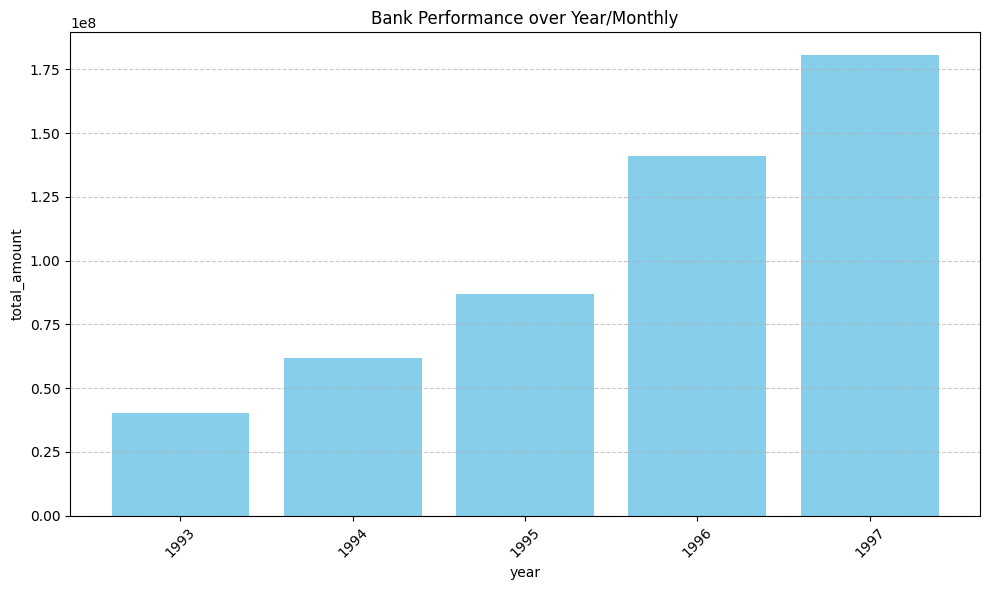

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_performance['year'], monthly_performance['total_amount'], color='skyblue')
plt.title('Bank Performance over Year/Monthly')
plt.xlabel('year')
plt.ylabel('total_amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

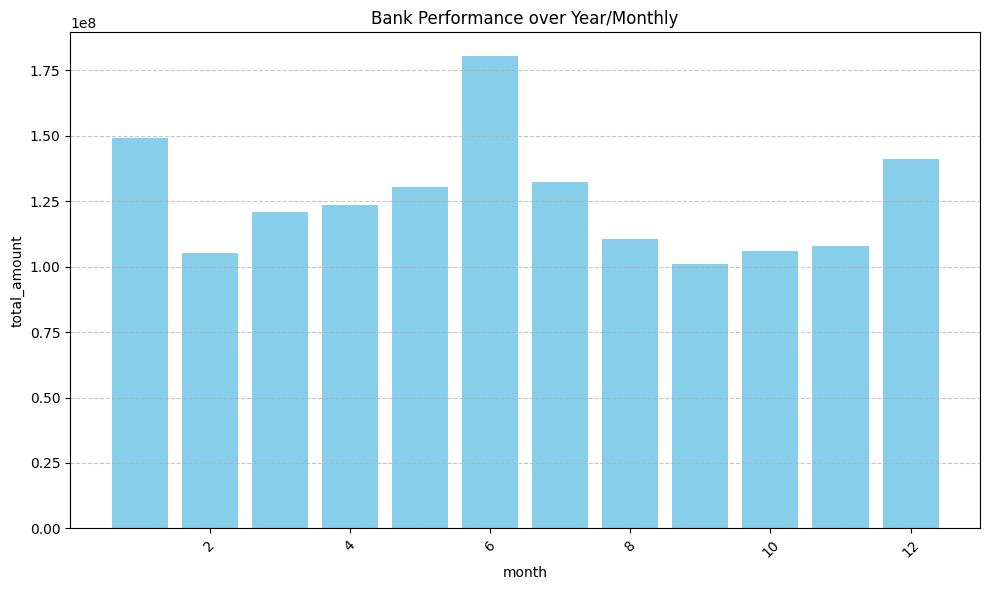

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(monthly_performance['month'], monthly_performance['total_amount'], color='skyblue')
plt.title('Bank Performance over Year/Monthly')
plt.xlabel('month')
plt.ylabel('total_amount')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.Most common types of accounts and their usage and profitability:**

In [ ]:
# Calculate the frequency of each account type
account_type_counts = accounts_df['frequency'].value_counts()

# Analyze usage metrics - number of transactions associated with each account type
usage_metrics = accounts_df.groupby('frequency')['account_id'].count()

# Analyze profitability metrics - average balance for each account type
merged_df = pd.merge(accounts_df,trans_df , on='account_id')
profitability_metrics = merged_df.groupby('frequency')['balance'].mean()

# Display the frequency of each account type
print("Frequency of Each Account Type:")
print(account_type_counts)

# Display usage metrics - number of transactions associated with each account type
print("\nUsage Metrics - Number of Transactions Associated with Each Account Type:")
print(usage_metrics)

# Display profitability metrics - average balance for each account type
print("\nProfitability Metrics - Average Balance for Each Account Type:")
print(profitability_metrics)

Frequency of Each Account Type:
frequency
POPLATEK MESICNE      4167
POPLATEK TYDNE         240
POPLATEK PO OBRATU      93
Name: count, dtype: int64

Usage Metrics - Number of Transactions Associated with Each Account Type:
frequency
POPLATEK MESICNE      4167
POPLATEK PO OBRATU      93
POPLATEK TYDNE         240
Name: account_id, dtype: int64

Profitability Metrics - Average Balance for Each Account Type:
frequency
POPLATEK MESICNE      35779.120218
POPLATEK PO OBRATU    47638.713985
POPLATEK TYDNE        50321.996055
Name: balance, dtype: float64


**4. Which types of cards are most frequently used by the bank's clients and what is the overall profitability of the credit card business?**

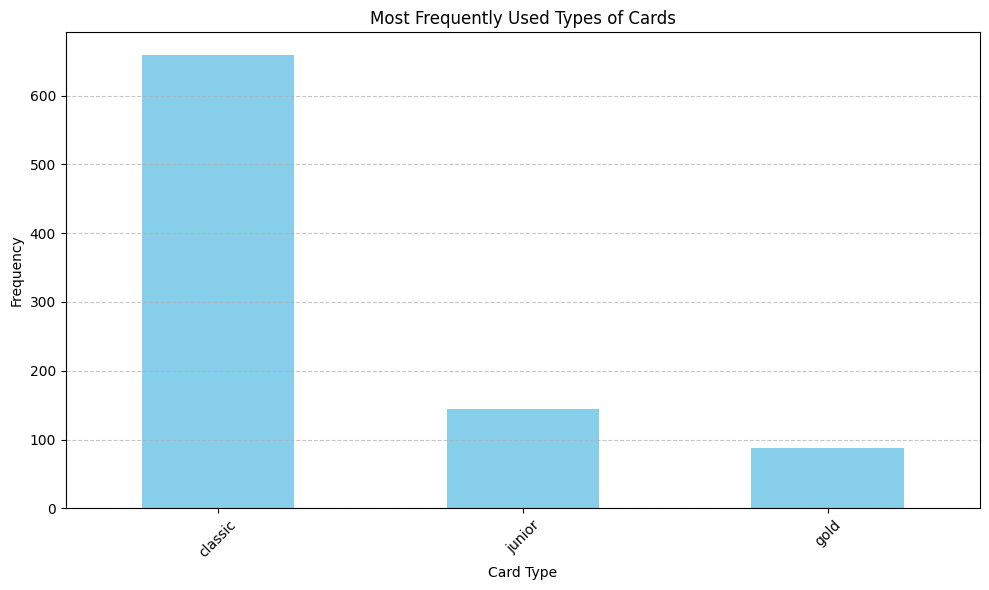

In [ ]:
card_type_counts = cards_df['type'].value_counts()

# Plotting
plt.figure(figsize=(10, 6))
card_type_counts.plot(kind='bar', color='skyblue')
plt.title('Most Frequently Used Types of Cards')
plt.xlabel('Card Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**5. What are the major expenses of the bank and how can they be reduced to improve profitability?**

In [ ]:
# Identify major expense categories from loan_df (e.g., loan amounts)
loan_expenses = loan_df['amount'].sum()

# Identify major expense categories from order_df (e.g., order amounts)
order_expenses = order_df['amount'].sum()

# Identify major expense categories from trans_df (e.g., transaction amounts)
transaction_expenses = trans_df['amount'].sum()

# Explore strategies to reduce expenses
# For example, you can optimize operational costs, manage non-performing loans, etc.

# Print major expenses and potential strategies to reduce them
print("Major Expenses of the Bank:")
print("Loan Expenses: ${}".format(loan_expenses))
print("Order Expenses: ${}".format(order_expenses))
print("Transaction Expenses: ${}".format(transaction_expenses))
print("\nStrategies for Reducing Expenses:")
print("- Optimize operational costs")
print("- Manage non-performing loans")

Major Expenses of the Bank:
Loan Expenses: $103261740
Order Expenses: $21228993.6
Transaction Expenses: $3727430740.3000007

Strategies for Reducing Expenses:
- Optimize operational costs
- Manage non-performing loans


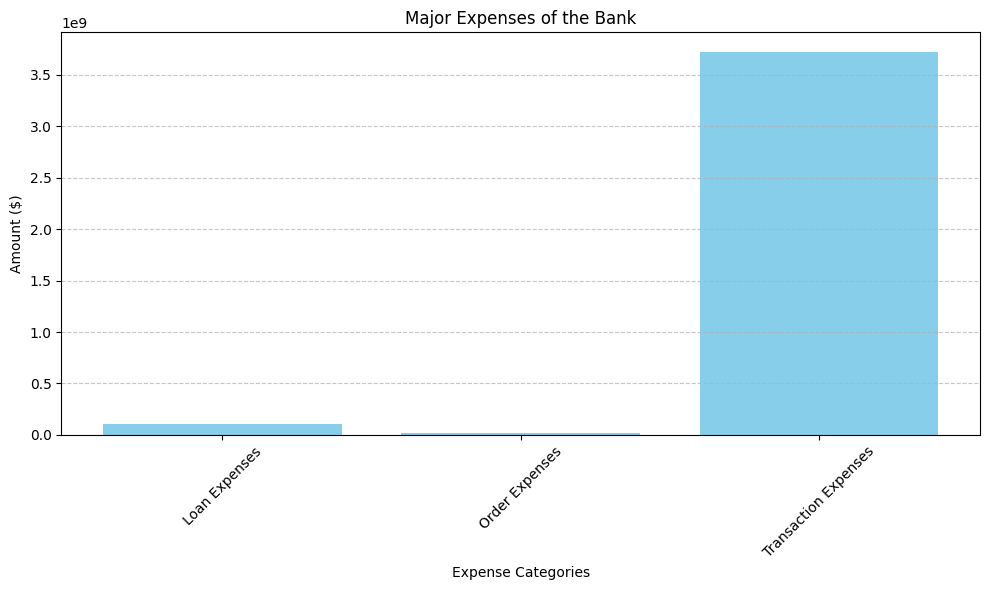

In [ ]:
expense_categories = ['Loan Expenses', 'Order Expenses', 'Transaction Expenses']

# Major expenses
expenses = [loan_expenses, order_expenses, transaction_expenses]

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(expense_categories, expenses, color='skyblue')
plt.title('Major Expenses of the Bank')
plt.xlabel('Expense Categories')
plt.ylabel('Amount ($)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**5. What is the bank’s loan portfolio and how does it vary across different purposes and client segments?**

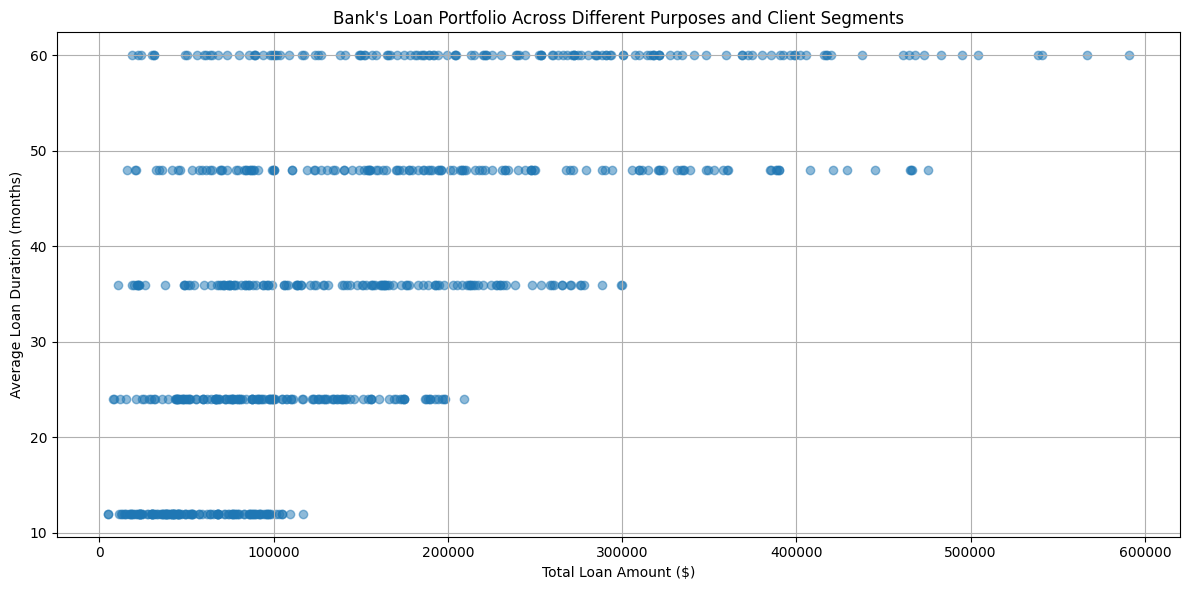

In [ ]:
loan_df['date'] = pd.to_datetime(loan_df['date'], format='%y%m%d')

# Group the data based on loan purposes and client segments
loan_portfolio = loan_df.groupby(['account_id']).agg(
    total_amount=('amount', 'sum'),
    average_duration=('duration', 'mean')
).reset_index()

# Visualize the loan portfolio
plt.figure(figsize=(12, 6))
plt.scatter(loan_portfolio['total_amount'], loan_portfolio['average_duration'], alpha=0.5)
plt.title("Bank's Loan Portfolio Across Different Purposes and Client Segments")
plt.xlabel('Total Loan Amount ($)')
plt.ylabel('Average Loan Duration (months)')
plt.grid(True)
plt.tight_layout()
plt.show()

**6. How can the bank improve its customer service and satisfaction levels?
Can the bank introduce new financial products or services to attract more customers and increase profitability?**

**Analysis:**

1. **High Transaction Expenses:**
The bank should investigate the factors contributing to high transaction expenses, such as inefficient processes, excessive fees, or operational inefficiencies. Streamlining processes and optimizing costs can help reduce expenses without compromising service quality.
2. **Improving Year-over-Year Performance:**
The positive trend in bank performance from 1993 to 1997 indicates effective management and strategic decision-making. To sustain this growth, the bank should continue identifying and capitalizing on opportunities for expansion, innovation, and efficiency improvements.
3. **High Transaction Amount in July:**
The highest transaction amount in July suggests seasonal patterns or increased economic activity during that period. The bank can leverage this insight to tailor marketing campaigns, promotions, or product offerings to capitalize on peak demand and enhance revenue generation.
4. **Preference for Classic Cards:**
The popularity of classic cards among clients indicates a market demand for traditional card products. While maintaining the classic card offering, the bank can also explore opportunities to diversify its card portfolio by introducing premium, rewards, or co-branded cards to attract a wider range of customers and increase revenue streams.
5. **Loan Duration and Amount Relationship:**
The positive correlation between loan duration and amount implies that customers may prefer longer loan terms for higher loan amounts. The bank can leverage this insight to design flexible loan products that cater to diverse financial needs and preferences, offering customizable terms and repayment options.

**Recommendations:**

1. **Introducing New Financial Products or Services:**


 a) Diversify Card Portfolio
 b) Innovative Loan Products
 c) Digital Banking Solutions

**Improving Customer Service and Satisfaction Levels: **-

a) By taking Customer Feedback b) Employee Training
c) Streamlined Processes d) Personalized Services

